# Surface concentrations

In [2]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.colors
from mpl_toolkits.basemap import Basemap, cm
import cmocean
import netCDF4 as nc
from itertools import compress
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

%matplotlib notebook

###### Parameters:

In [3]:
imin, imax = 1480, 2180
jmin, jmax = 160, 800
isize = imax - imin
jsize = jmax - jmin

# model results:
year  = 2015
results_folder = '/data/brogalla/run_storage/Mn-set4-202004/'+'ref-'+str(year)+'/'

###### Load files:

In [4]:
mask      = nc.Dataset('/ocean/brogalla/GEOTRACES/ariane_runs/ANHA12_Ariane_mesh.nc')
tmask     = np.array(mask.variables['tmask'])[0,:,imin:imax,jmin:jmax]
land_mask = np.ma.masked_where((tmask[:,:,:] > 0.1), tmask[:,:,:]) 

mesh  = nc.Dataset('/data/brogalla/old/meshmasks/ANHA12_mesh1.nc')
lon   = np.array(mesh.variables['nav_lon'])
lat   = np.array(mesh.variables['nav_lat'])
tmask2     = np.array(mask.variables['tmask'])[0,:,:,:]
land_mask2 = np.ma.masked_where((tmask2[:,:,:] > 0.1), tmask2[:,:,:]) 
mesh_bathy = np.array(mesh.variables['hdept'][0])

In [5]:
ref   = nc.Dataset(results_folder+'ANHA12_EXH006_'+str(year)+'_monthly.nc',  'r')
lons  = np.array(ref.variables['nav_lon'])
lats  = np.array(ref.variables['nav_lat'])
depth = np.array(ref.variables['deptht'])

In [6]:
results  = nc.Dataset(results_folder+'ANHA12_EXH006_'+str(year)+'_monthly.nc')
dissolmn = np.array(results.variables['dissolmn'][:,0,:,:,:])*10**9 # nM units

##### Functions:

##### Figures of surface concentrations:

In [7]:
month=8
layer=0

<IPython.core.display.Javascript object>


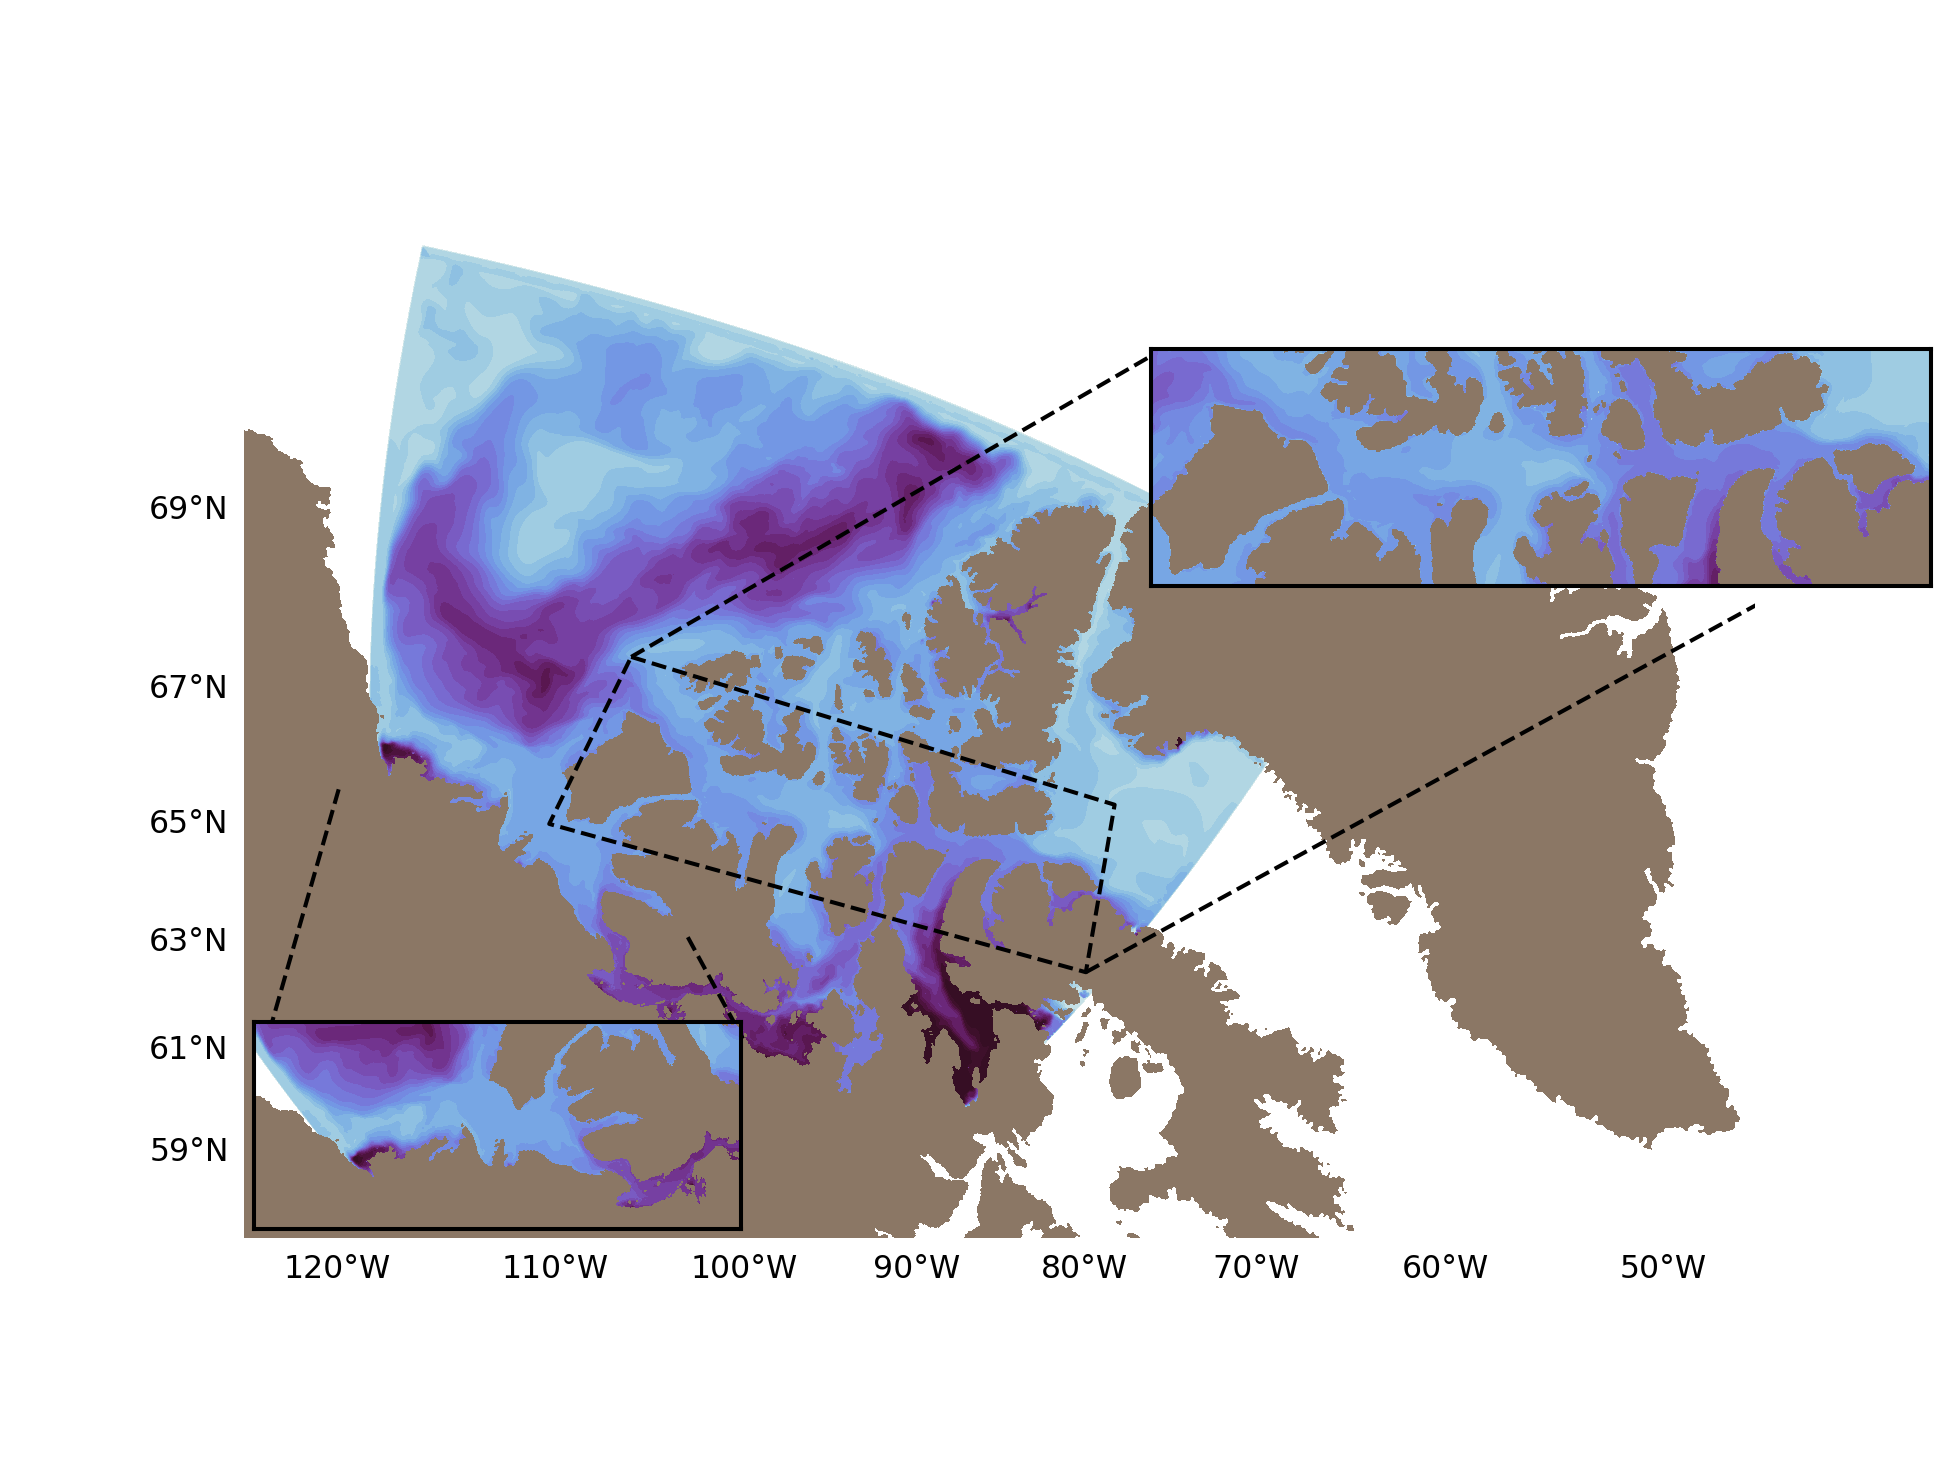

[None, None, None, None, None, None, None, None]

In [8]:
fig, ax1, proj1 = pickle.load(open('/ocean/brogalla/GEOTRACES/pickles/mn-reference.pickle','rb'))

x1, y1 = proj1(lons, lats)

vmin=0
vmax=20

contour = proj1.contourf(x1, y1, dissolmn[month,layer,:,:], np.arange(vmin,vmax+1,1),\
                             cmap=cmocean.cm.dense, vmin=vmin, vmax=vmax, extend='both')


# ---- Parry Channel inset ---------------------------------------------------------------------------------

inset_ax2 = fig.add_axes([.59, .43, .4, .5])

proj2 = Basemap(projection='stere',lat_0 = 74.4, lon_0 = -101, resolution='h', width=1.65e6, height=0.50e6, ax=inset_ax2)
x_mask, y_mask = proj2(lon, lat)
proj2.contourf(x_mask, y_mask, land_mask2[0,:,:], vmax=0.3, cmap=matplotlib.colors.ListedColormap(["#8b7765"]), zorder=2)

x2, y2   = proj2(lons, lats)
contour2 = proj2.contourf(x2, y2, dissolmn[month,layer,:,:], np.arange(vmin,vmax+1,1),\
                             cmap=cmocean.cm.dense, vmin=vmin, vmax=vmax, extend='both')

x2l, y2l = proj1([-128,-25], [75.5, 85])
x2r, y2r = proj1([-78, 0], [70.7, 60])
x2box, y2box = proj1([-128, -73, -78, -124, -128], [75.5, 75, 70.7, 70.7, 75.5])
proj1.plot(x2l, y2l, '--k', linewidth=1.8, zorder=4)
proj1.plot(x2r, y2r, '--k', linewidth=1.8, zorder=4)
proj1.plot(x2box, y2box, '--k', linewidth=1.8, zorder=4)

plt.setp(inset_ax2.spines.values(), linewidth=1.8, color='k')

# ---- Mackenzie river inset -------------------------------------------------------------------------------

inset_ax3 = fig.add_axes([0.13, 0.13, .25, .2])

x3l, y3l = proj1([-137, -129], [67.5, 61.5])
x3r, y3r = proj1([-110, -103.5], [70, 68])
# x3box, y3box = proj1([-128, -73, -78, -124, -128], [75.5, 75, 70.7, 70.7, 75.5])
proj1.plot(x3l, y3l, '--k', linewidth=1.8, zorder=4)
proj1.plot(x3r, y3r, '--k', linewidth=1.8, zorder=4)
# proj1.plot(x3box, y3box, '--k', linewidth=1.8, zorder=4)

proj3 = Basemap(projection='stere',lat_0 = 70.6, lon_0 = -125, resolution='h', width=1.65e6, height=0.70e6, ax=inset_ax3)
x_mask, y_mask = proj3(lon, lat)
proj3.contourf(x_mask, y_mask, land_mask2[0,:,:], vmax=0.3, cmap=matplotlib.colors.ListedColormap(["#8b7765"]), zorder=2)

x3, y3 = proj3(lons, lats)
contour3 = proj3.contourf(x3, y3, dissolmn[month,layer,:,:], np.arange(vmin,vmax+1,1),\
                             cmap=cmocean.cm.dense, vmin=vmin, vmax=vmax, extend='both')

plt.setp(inset_ax3.spines.values(), linewidth=1.8, color='k')


<IPython.core.display.Javascript object>


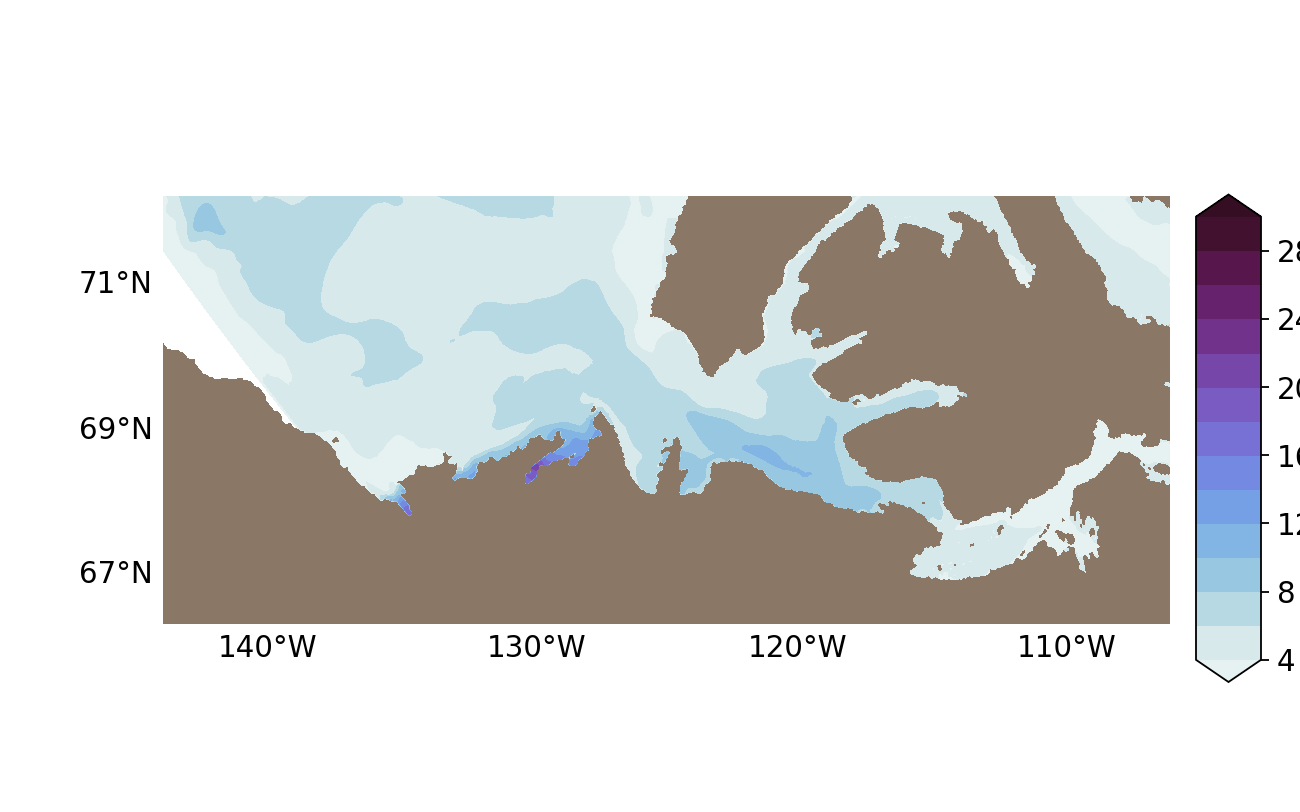

In [36]:
fig, ax1, proj1 = pickle.load(open('/ocean/brogalla/GEOTRACES/pickles/mackenzie-river.pickle','rb'))

x, y = proj1(lons, lats)
x_barrow, y_barrow = proj1([-99, -99], [73.6, 75.3])

vmin    = 4
vmax    = 30
contour = proj1.contourf(x, y, dissolmn[month,layer,:,:], np.arange(vmin,vmax+1,2),\
                             cmap=cmocean.cm.dense, vmin=vmin, vmax=vmax, extend='both')


cbar_ax = fig.add_axes([0.92, 0.16, 0.05, 0.6])
cbar    = fig.colorbar(contour, cax=cbar_ax)
cbar.set_label('Dissolved Mn [nM]', fontsize=13) 
cbar_ax.tick_params(axis='both', which='major', labelsize=13)


# fig.savefig('/ocean/brogalla/GEOTRACES/figures/R3-Mackenzie-River.png', bbox_inches='tight', dpi=300)

<IPython.core.display.Javascript object>


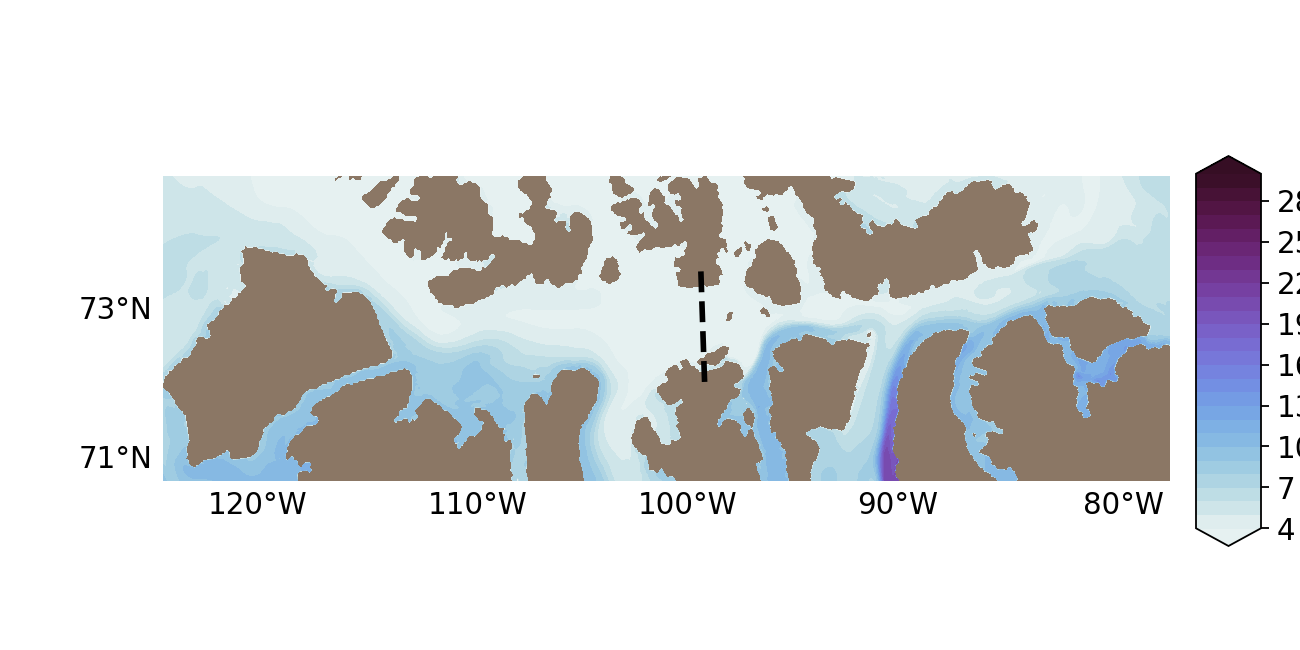

In [204]:
fig, ax1, proj1 = pickle.load(open('/ocean/brogalla/GEOTRACES/pickles/parry-channel.pickle','rb'))

x, y = proj1(lons, lats)
x_barrow, y_barrow = proj1([-99, -99], [73.6, 75.3])

vmin    = 4
vmax    = 30
contour = proj1.contourf(x, y, dissolmn[month,layer,:,:], np.arange(vmin,vmax+1,1),\
                             cmap=cmocean.cm.dense, vmin=vmin, vmax=vmax, extend='both')

vmin2 = 4
vmax2 = 30
dmn   = np.ma.masked_where((tmask[layer,:,:] < 0.1), dissolmn[month,layer,:,:]) 
# proj1.contour(x, y, dissolmn[month,layer,:,:], levels=np.arange(vmin2,vmax2+1,4), \
#               vmin=vmin2, vmax=vmax2, colors='#1a2b75')

# proj1.plot(x_barrow, y_barrow, '--w', linewidth=3.0)
proj1.plot(x_barrow, y_barrow, '--k', linewidth=2.5)

cbar_ax = fig.add_axes([0.92, 0.16, 0.05, 0.6])
cbar    = fig.colorbar(contour, cax=cbar_ax)
cbar.set_label('Dissolved Mn [nM]', fontsize=13) 
cbar_ax.tick_params(axis='both', which='major', labelsize=13)


# fig.savefig('/ocean/brogalla/GEOTRACES/figures/R3-Parry-Channel.png', bbox_inches='tight', dpi=300)

<IPython.core.display.Javascript object>


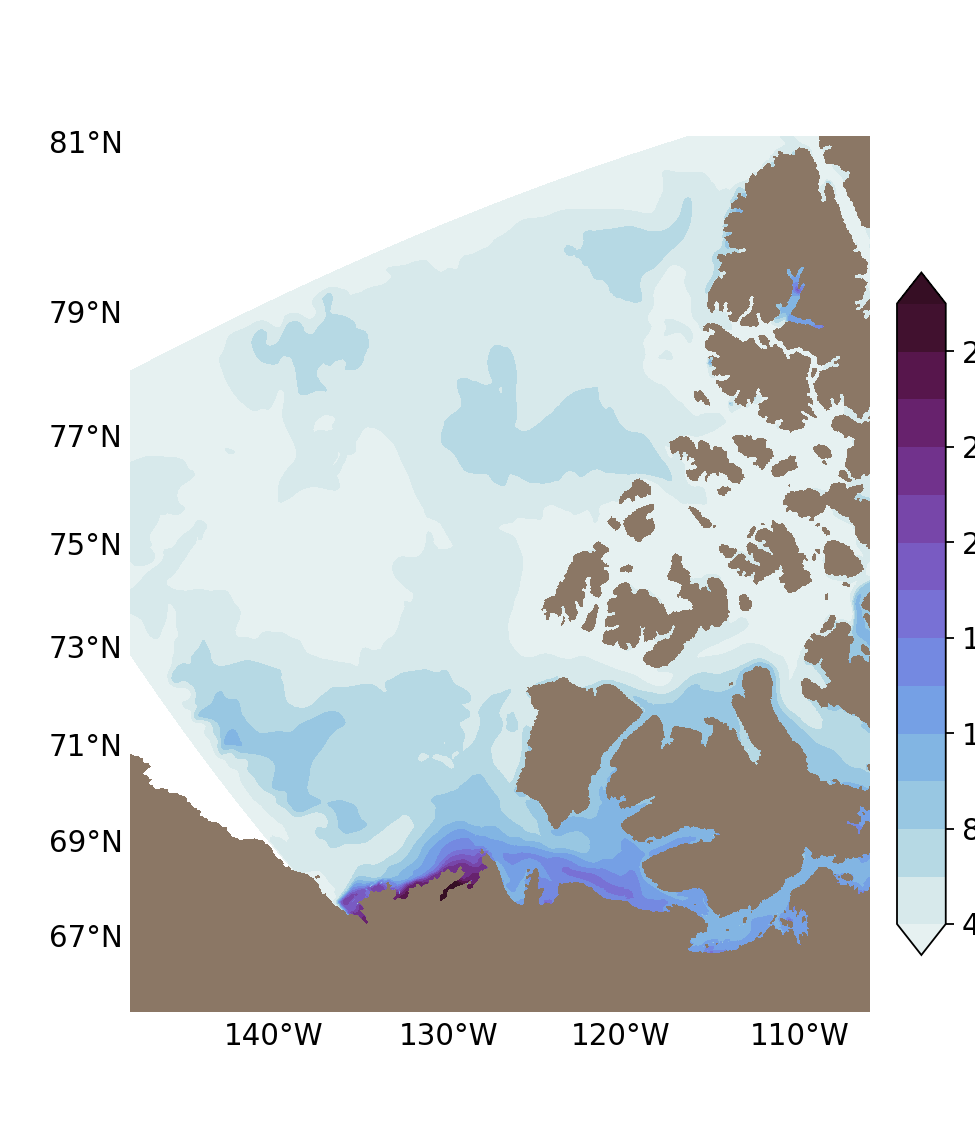

In [205]:
fig, ax1, proj1 = pickle.load(open('/ocean/brogalla/GEOTRACES/pickles/canada-basin.pickle','rb'))

x, y = proj1(lons, lats)

vmin    = 4
vmax    = 30
contour = proj1.contourf(x, y, dissolmn[month,layer,:,:], np.arange(vmin,vmax+1,2),\
                             cmap=cmocean.cm.dense, vmin=vmin, vmax=vmax, extend='both')

cbar_ax = fig.add_axes([0.92, 0.16, 0.05, 0.6])
cbar    = fig.colorbar(contour, cax=cbar_ax)
cbar.set_label('Dissolved Mn [nM]', fontsize=13) 
cbar_ax.tick_params(axis='both', which='major', labelsize=13)

# fig.savefig('/ocean/brogalla/GEOTRACES/figures/R3-Canada-Basin.png', bbox_inches='tight', dpi=300)